# Abalone Case Study

## Problem Statement:

## Feature Information:

# Predict the rings of abalone to know the age of that abalone

In [2]:
# Import necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import csv file
df = pd.read_csv('abalone_1.csv')
df

,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings(Age)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


key takeaway at first sight of data
1. Except Gender & Target variable, all features are standardized
2. We'll have to convert categorical column (Gender) into binary

In [4]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4177 non-null   object 
 1   Length           4177 non-null   float64
 2   Diameter         4177 non-null   float64
 3   Height           4177 non-null   float64
 4   Whole Weight     4177 non-null   float64
 5   Shucked Weight   4177 non-null   float64
 6    Viscera Weight  4177 non-null   float64
 7    Shell Weight    4177 non-null   float64
 8    Rings(Age)      4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
#check null values
df.isnull().sum()

Gender             0
Length             0
Diameter           0
Height             0
Whole Weight       0
Shucked Weight     0
 Viscera Weight    0
 Shell Weight      0
 Rings(Age)        0
dtype: int64

In [6]:
df["Gender"].unique()

array(['M', 'F', 'I'], dtype=object)

In [7]:
df['Gender'].value_counts()

M    1528
I    1342
F    1307
Name: Gender, dtype: int64

Distribution of Gender is balanced

<AxesSubplot:xlabel='Gender', ylabel='count'>

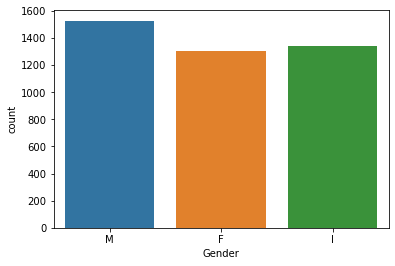

In [8]:
sns.countplot(df['Gender'])

In [9]:
df[' Rings(Age)'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name:  Rings(Age), dtype: int64

<AxesSubplot:xlabel=' Rings(Age)', ylabel='Count'>

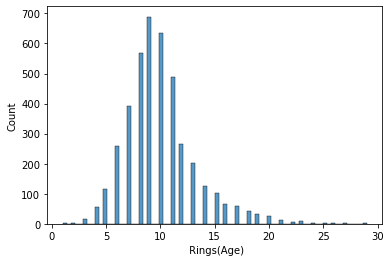

In [10]:
sns.histplot(df[' Rings(Age)'])

### Statistics

In [11]:
df.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings(Age)
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
df.corr()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings(Age)
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings(Age),0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

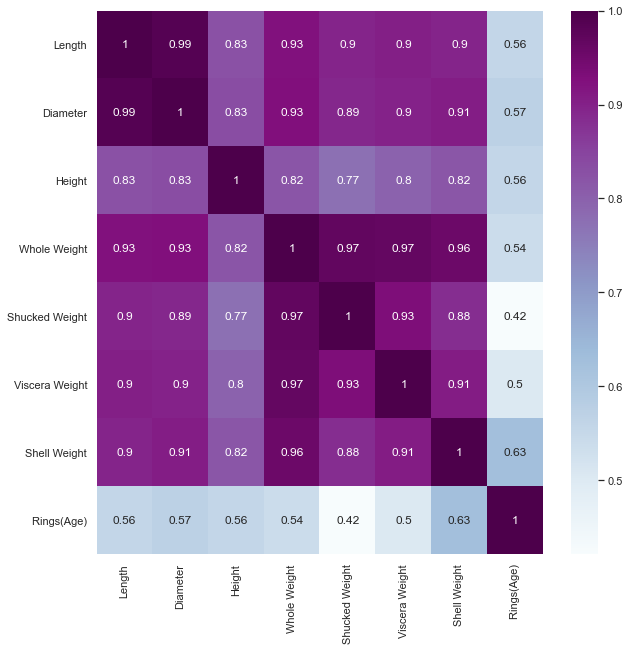

In [13]:
sns.set(style = 'dark')
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True, cmap = 'BuPu')

### Visualisation

<AxesSubplot:xlabel='Length', ylabel=' Rings(Age)'>

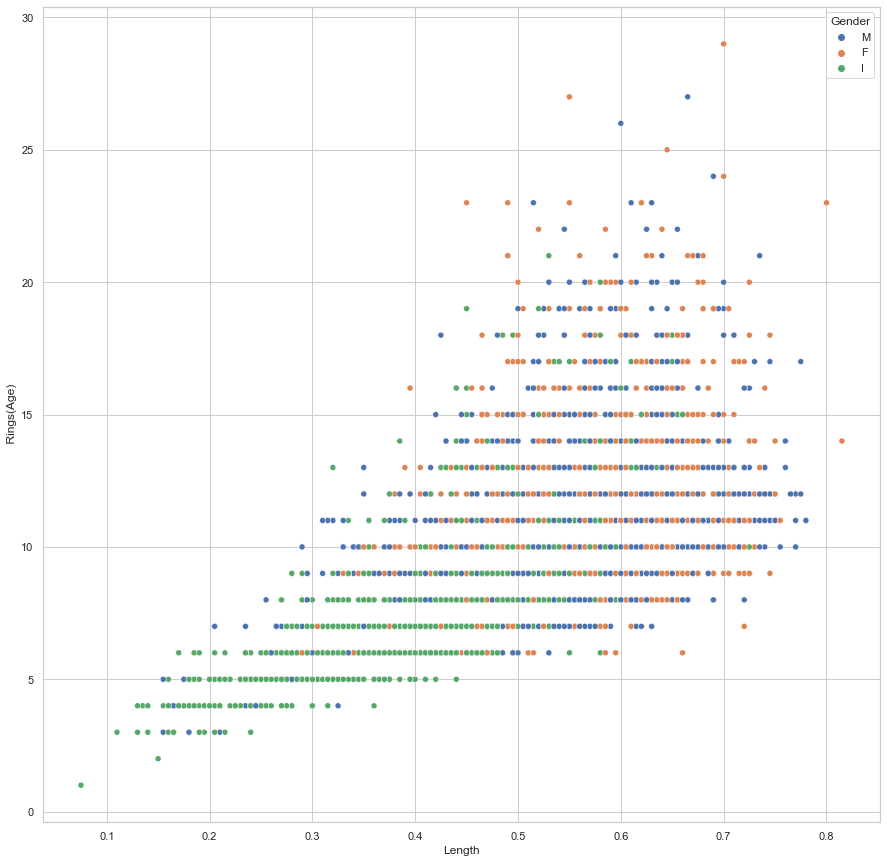

In [14]:
plt.figure(figsize=(15,15))
sns.set(style = 'whitegrid')
sns.scatterplot(x='Length', y=' Rings(Age)',data=df,hue='Gender')

<AxesSubplot:xlabel='Diameter', ylabel=' Rings(Age)'>

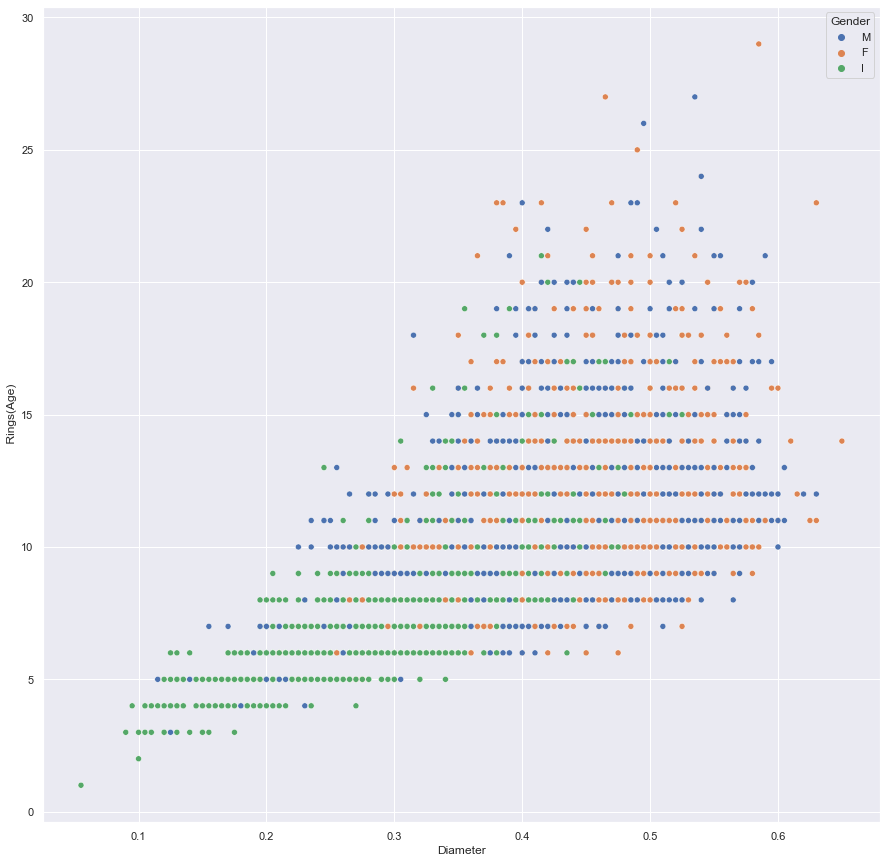

In [15]:
plt.figure(figsize=(15,15))
sns.set(style = 'darkgrid')
sns.scatterplot(x='Diameter', y=' Rings(Age)',data=df,hue='Gender')

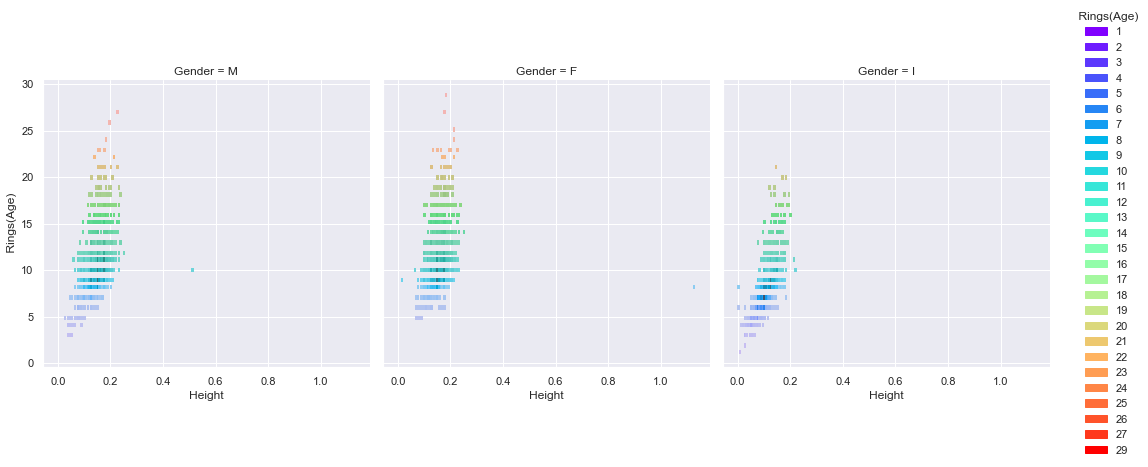

In [16]:
sns.set(style = 'darkgrid')
sns.displot(x='Height',y=' Rings(Age)',col='Gender',data = df, hue = ' Rings(Age)', kind = 'hist',palette = 'rainbow')

<Figure size 1152x864 with 0 Axes>

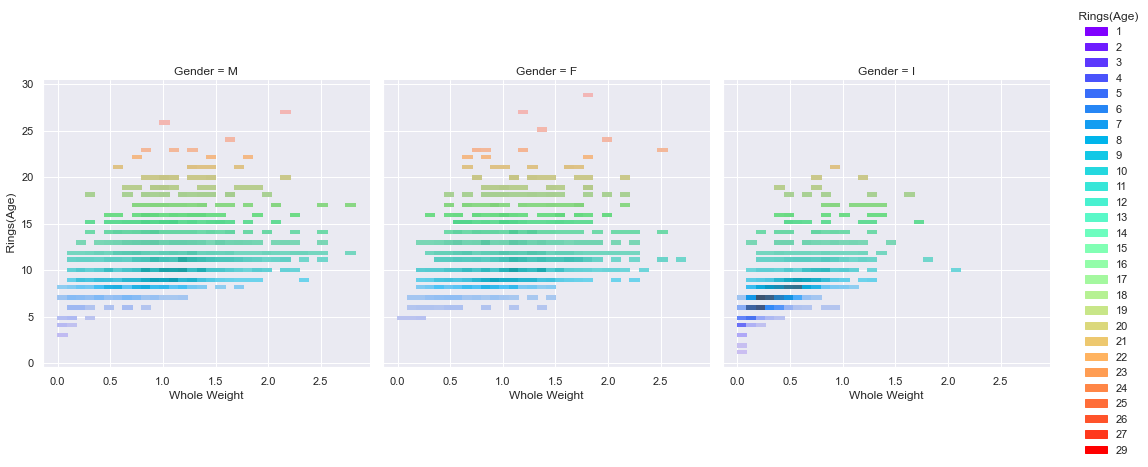

In [17]:
#sns.displot?
plt.figure(figsize=(16,12))
sns.set(style = 'darkgrid')
sns.displot(x='Whole Weight',y=' Rings(Age)',col='Gender',data = df, hue = ' Rings(Age)', kind = 'hist',palette = 'rainbow')

<Figure size 1152x864 with 0 Axes>

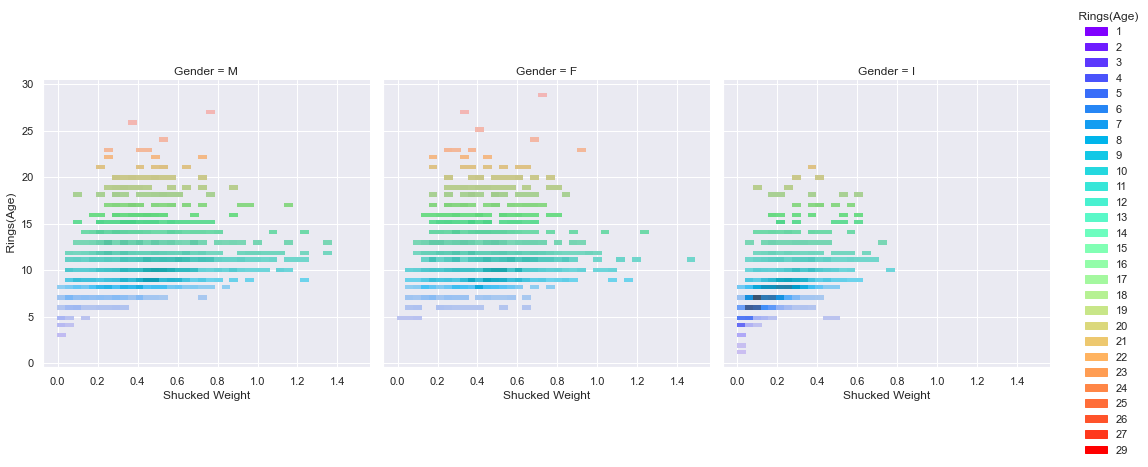

In [18]:
plt.figure(figsize=(16,12))
sns.set(style = 'darkgrid')
sns.displot(x='Shucked Weight',y=' Rings(Age)',col='Gender',data = df, hue = ' Rings(Age)', kind = 'hist',palette = 'rainbow')

<Figure size 1152x864 with 0 Axes>

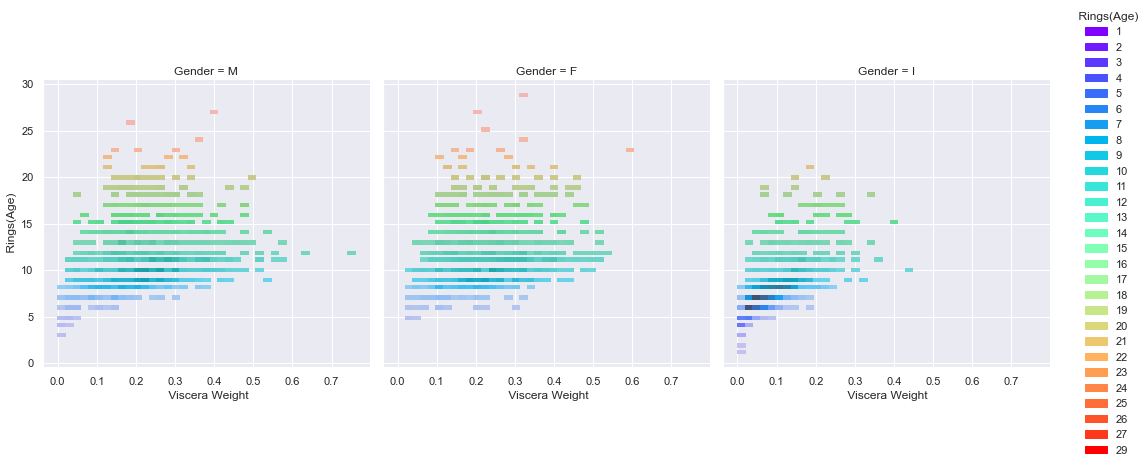

In [19]:
plt.figure(figsize=(16,12))
sns.set(style = 'darkgrid')
sns.displot(x=' Viscera Weight',y=' Rings(Age)',col='Gender',data = df, hue = ' Rings(Age)', kind = 'hist',palette = 'rainbow')

<Figure size 1152x864 with 0 Axes>

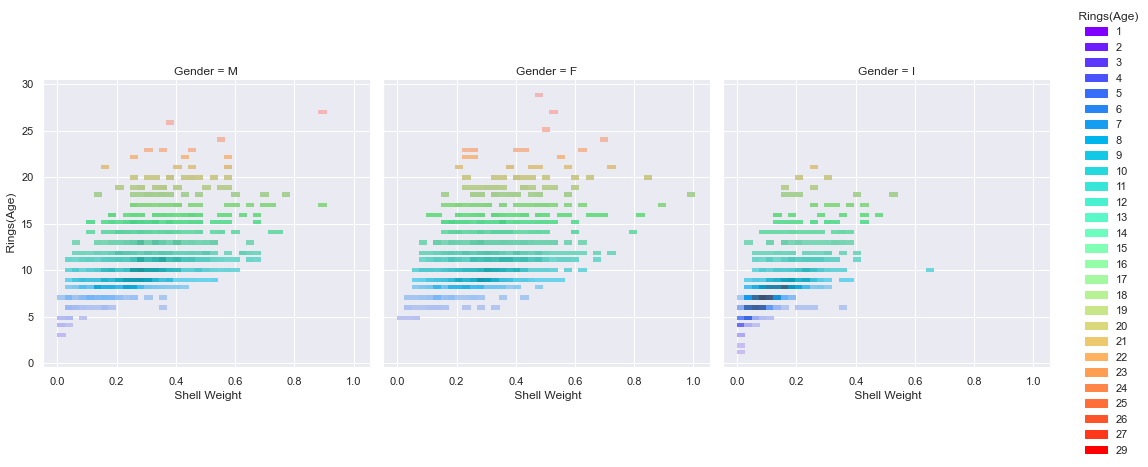

In [20]:
plt.figure(figsize=(16,12))
sns.set(style = 'darkgrid')
sns.displot(x=' Shell Weight',y=' Rings(Age)',col='Gender',data = df, hue = ' Rings(Age)', kind = 'hist',palette = 'rainbow')

From the correlation matrix and graphical representation, we can say that, there will linear positive relation with some exception

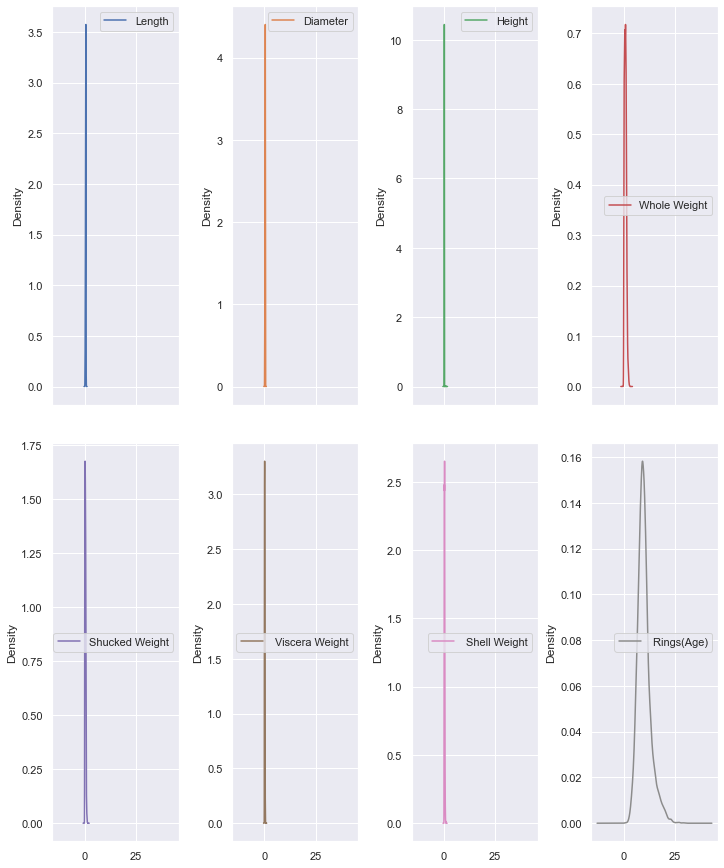

In [21]:
sns.set(style = 'darkgrid')
df.plot(kind = 'kde', subplots = True, layout = (2,4), figsize  = (10,12))
plt.tight_layout(pad=0.4,w_pad=0.7,h_pad=3)

<AxesSubplot:ylabel='Frequency'>

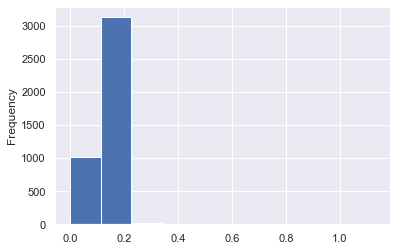

In [25]:
df['Height'].plot.hist()

In [22]:
#Threshold = +/- 1.0
df.skew()

Length            -0.639873
Diameter          -0.609198
Height             3.128817
Whole Weight       0.530959
Shucked Weight     0.719098
 Viscera Weight    0.591852
 Shell Weight      0.620927
 Rings(Age)        1.114102
dtype: float64

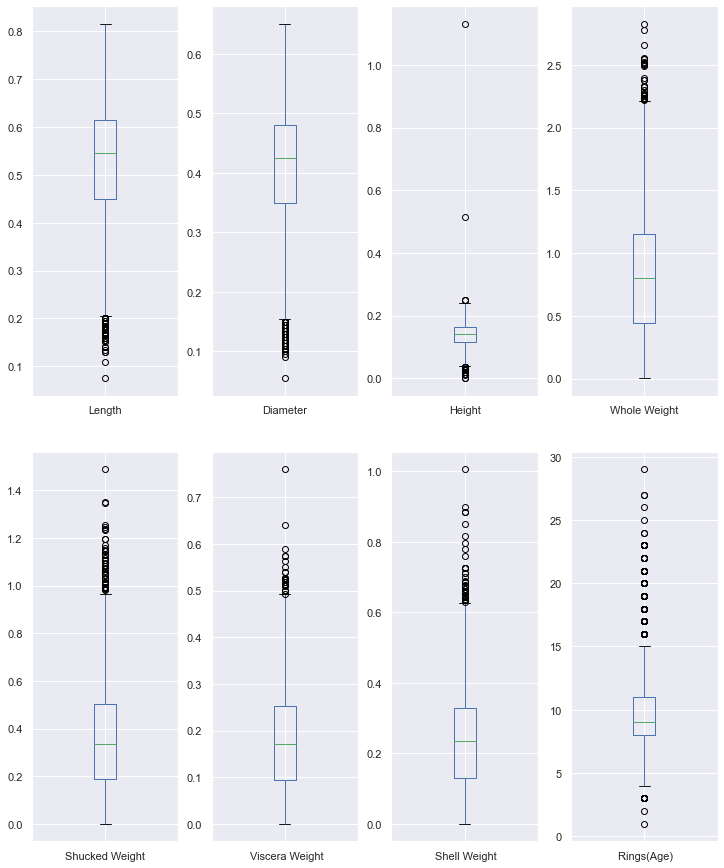

In [26]:
sns.set(style = 'darkgrid')
df.plot(kind = 'box', subplots = True, layout = (2,4), figsize  = (10,12))
plt.tight_layout(pad=0.4,w_pad=0.7,h_pad=3)

In [ ]:
#Significant amount of outliers are visible

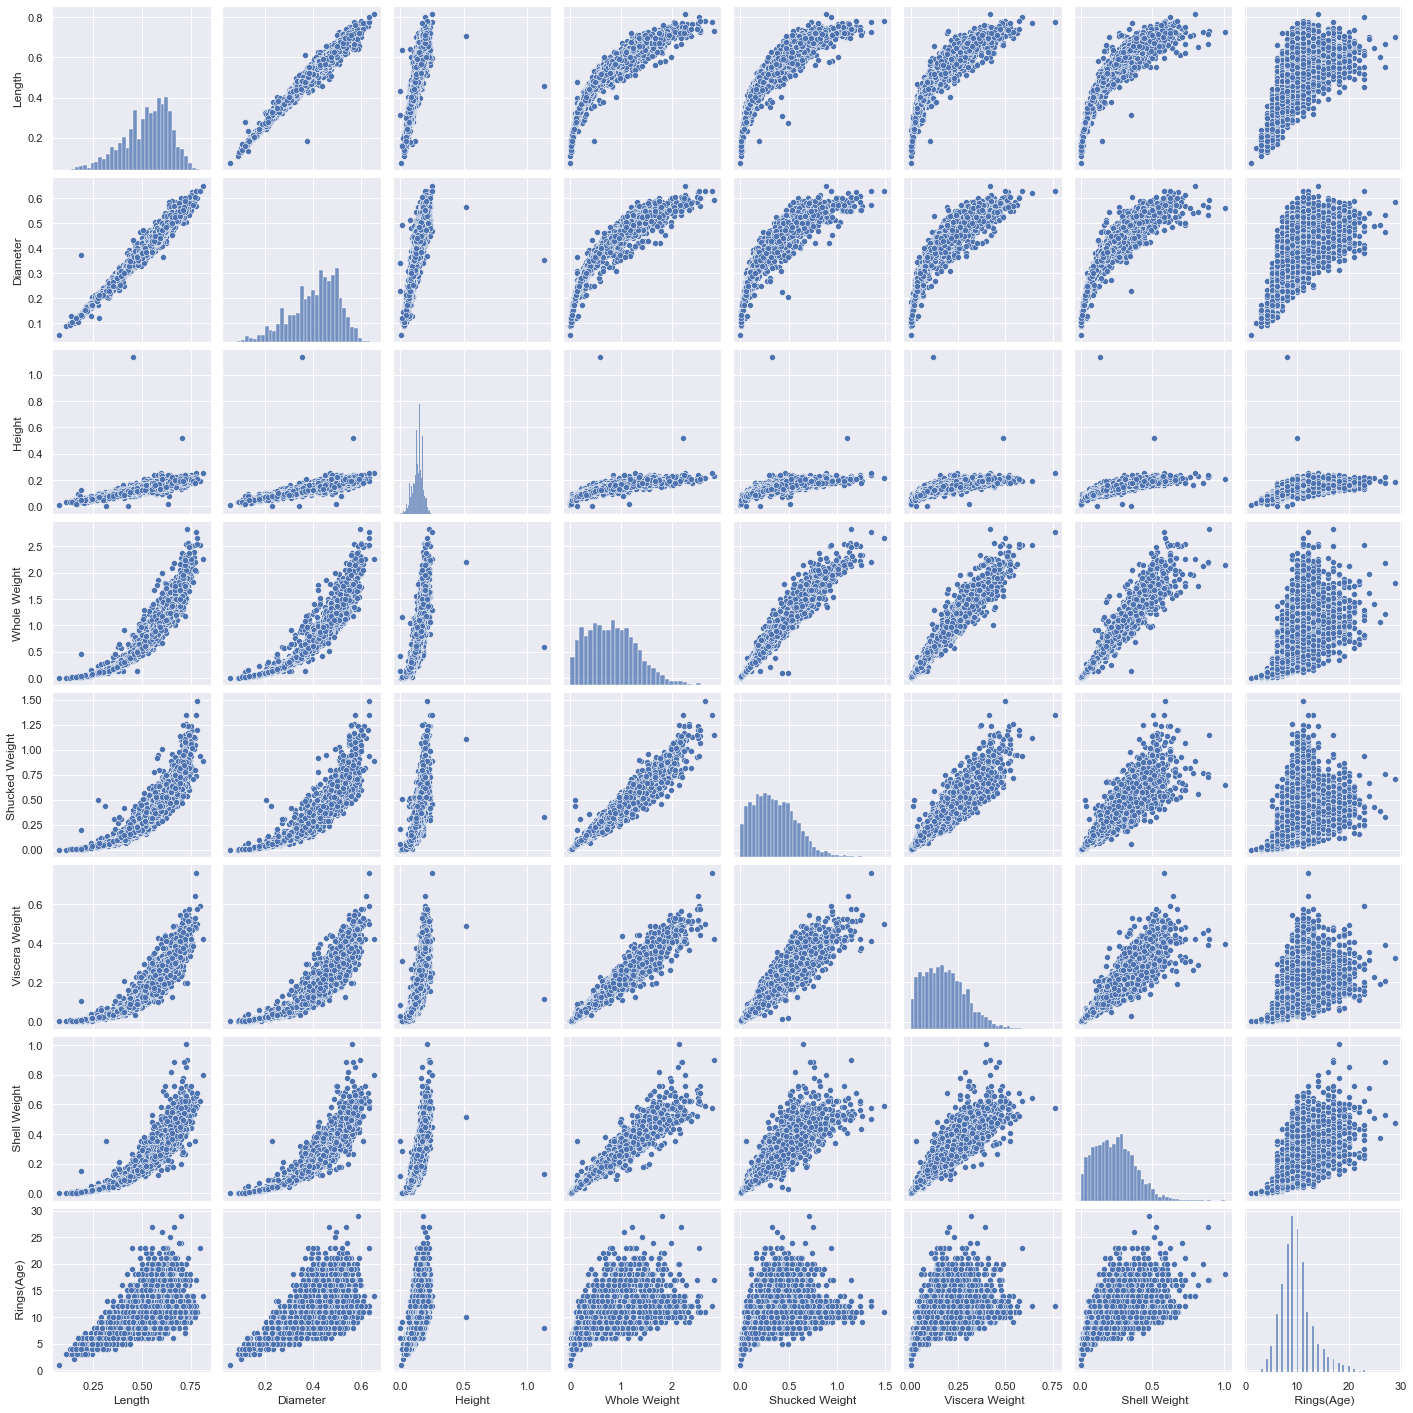

In [27]:
sns.pairplot(df)

### Feature Engineering

In [28]:
#converting categorical values into numerical
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Gender'] = encode.fit_transform(df['Gender'])

In [29]:
df['Gender'].value_counts()

2    1528
1    1342
0    1307
Name: Gender, dtype: int64

In [30]:
#Removing outliers
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [33]:
z[:][:]

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [34]:
new_df = df[(z<3).all(axis=1)]

In [35]:
print(df.shape, new_df.shape)

(4177, 9) (4027, 9)


In [36]:
outliers = ((4177-4027)/4177)*100
print(f'{round(outliers,2)}% of outliers exist in dataset')

3.59% of outliers exist in dataset


### Variance Inflation Factor

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
#splitting dataset
x = new_df.drop(' Rings(Age)',axis=1)
y = new_df[' Rings(Age)']

In [82]:
x.columns

Index(['Gender', 'Length', 'Height', 'Shucked Weight', ' Viscera Weight',
       ' Shell Weight'],
      dtype='object')

In [83]:
x.values[:]

array([[2.    , 0.455 , 0.095 , 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.09  , 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.135 , 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.205 , 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.15  , 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.195 , 0.9455, 0.3765, 0.495 ]])

In [84]:
y.shape 

(4027,)

In [85]:
def vif_factor(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    return vif

In [86]:
vif_factor(x)

,Features,VIF
0,Gender,2.584736
1,Length,81.106391
2,Height,89.812303
3,Shucked Weight,32.578203
4,Viscera Weight,40.495346
5,Shell Weight,35.175783


In [60]:
#dropping 'Diameter' due to high variance
x = new_df.drop(['Diameter'], axis=1)

In [61]:
vif_factor(x)

,Features,VIF
0,Gender,2.592496
1,Length,92.260017
2,Height,94.174553
3,Whole Weight,452.644051
4,Shucked Weight,123.125100
5,Viscera Weight,66.286833
6,Shell Weight,93.805887
7,Rings(Age),25.081676


In [75]:
#dropping 'Whole Weight'
x = new_df.drop(['Whole Weight','Diameter'], axis = 1,inplace = True)

In [87]:
vif_factor(x)

,Features,VIF
0,Gender,2.584736
1,Length,81.106391
2,Height,89.812303
3,Shucked Weight,32.578203
4,Viscera Weight,40.495346
5,Shell Weight,35.175783


In [78]:
#checking skewness on new dataset
new_df.skew()

Gender            -0.094886
Length            -0.623076
Height            -0.244251
Shucked Weight     0.458295
 Viscera Weight    0.437116
 Shell Weight      0.349471
 Rings(Age)        0.725464
dtype: float64

In [88]:
x = new_df.drop([' Rings(Age)'], axis = 1)
y = new_df[' Rings(Age)']

In [89]:
x.shape, y.shape

((4027, 6), (4027,))

In [102]:
x.columns

Index(['Gender', 'Length', 'Height', 'Shucked Weight', ' Viscera Weight',
       ' Shell Weight'],
      dtype='object')

## Deployment of Model

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [93]:
for i in range(20,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.23,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    score = lr.score(x_train, y_train)
    y_pred = lr.predict(x_test)
    print('For random state:',i)
    print('Actual Score:',round(score*100,3))
    print('Model coefficient:', lr.coef_  )
    print('\n')

For random state: 20
Actual Score: 45.675
Model coefficient: [ 1.59515237e-02  8.11637630e+00  2.32385855e+01 -1.12965409e+01
 -1.45428611e+00  1.70700996e+01]


For random state: 21
Actual Score: 49.831
Model coefficient: [ 0.09334814  4.91239754 31.60342961 -9.52467231  0.44477444 15.10219162]


For random state: 22
Actual Score: 49.045
Model coefficient: [ 3.14070109e-03  6.85772376e+00  1.72946828e+01 -1.17531449e+01
  3.97437745e+00  1.77930965e+01]


For random state: 23
Actual Score: 47.14
Model coefficient: [ 4.52347753e-03  9.45549116e+00  2.52941831e+01 -1.26586198e+01
  2.31917094e+00  1.54483588e+01]


For random state: 24
Actual Score: 46.097
Model coefficient: [ 8.42289609e-03  7.62113431e+00  2.38052076e+01 -1.05911428e+01
  3.04125057e+00  1.33973110e+01]


For random state: 25
Actual Score: 52.357
Model coefficient: [ 1.88229333e-01  9.11503386e+00  2.96302477e+01 -1.15676974e+01
  1.24999519e-02  1.57294224e+01]


For random state: 26
Actual Score: 50.867
Model coeffi

For random state: 76
Actual Score: 49.465
Model coefficient: [  0.18818831   6.94984594  29.68485996 -10.41028972  -0.14678128
  15.49316419]


For random state: 77
Actual Score: 50.513
Model coefficient: [ 0.09231141  5.06005171 23.14838116 -8.3311164  -3.29332348 18.60244777]


For random state: 78
Actual Score: 48.771
Model coefficient: [  0.08832372   6.29127722  27.12429715 -10.20050047   1.4972336
  15.52180312]


For random state: 79
Actual Score: 48.04
Model coefficient: [  0.03232255   7.22056832  19.90444846 -11.40872141   4.19380111
  16.45414627]


For random state: 80
Actual Score: 48.229
Model coefficient: [  0.08884832   6.64943887  22.47661905 -11.47556303   0.88943818
  18.4175043 ]


For random state: 81
Actual Score: 48.888
Model coefficient: [ -0.02997247   4.39235336  22.11539755 -11.36492937   1.94781124
  20.0856282 ]


For random state: 82
Actual Score: 50.498
Model coefficient: [ -0.09060149   9.27667491  20.50532813 -11.02757762   0.89599783
  16.08458578]


F

In [96]:
#Select random_state = 53
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.23,random_state=53)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
lr.coef_

array([  0.09227199,   6.78370706,  22.85058939, -11.68970105,
         0.97521687,  19.05204433])

In [107]:
y_pred = lr.predict(x_test)
print('Mean absoulte error:',mean_absolute_error(y_test,y_pred))
print('Root Mean squared error:',mean_squared_error(y_test,y_pred)**0.5)
print('R2 Score:',r2_score(y_test,y_pred))

Mean absoulte error: 1.5331863710828475
Root Mean squared error: 2.044954273034639
R2 Score: 0.40595866403127


## Hyperparameter Tuning & Building Model

### SGD Regressor

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd_para = {'alpha': [1,0.1,0.01,0.001,0.0001,0],
            'penalty':['l2','l1'],
            'learning_rate': ['optimal','constant','invscaling']}
sgd_tuning = GridSearchCV(estimator = sgd, param_grid = sgd_para, cv = 10)
sgd_tuning.fit(x,y)
print(sgd_tuning.best_params_)
print(sgd_tuning.best_score_)

{'alpha': 0.0001, 'learning_rate': 'constant', 'penalty': 'l2'}
0.3917283022629097


In [121]:
sgd = SGDRegressor(alpha = 0.0001, learning_rate = 'constant', penalty = 'l2')
sgd.fit(x_train, y_train)
sgd.score(x_train,y_train)
y_pred = sgd.predict(x_test)
print('Model Prediction on trained Dataset:',round(sgd.score(x_train,y_train)*100,2),'%')
print('Mean absoulte error:',mean_absolute_error(y_test,y_pred))
print('Root Mean squared error:',mean_squared_error(y_test,y_pred)**0.5)
print('R2 Score:',round(r2_score(y_test,y_pred)*100,2),'%')

Model Prediction on trained Dataset: 48.72 %
Mean absoulte error: 1.6889637171402663
Root Mean squared error: 2.136260746257856
R2 Score: 35.17 %


### SVR

In [110]:
from sklearn.svm import SVR
svr = SVR()
svr_para = {'C': [0.9,1,1.2],
            'kernel': ['rbf','poly','linear'],
            }
svr_tuning = GridSearchCV(estimator = svr, param_grid = svr_para)
svr_tuning.fit(x,y)
print(svr_tuning.best_params_)
print(svr_tuning.best_score_)

{'C': 1.2, 'kernel': 'rbf'}
0.4331556269016425


In [120]:
svr = SVR(C=1.2, kernel = 'rbf')
svr.fit(x_train, y_train)
svr.score(x_train,y_train)
y_pred = svr.predict(x_test)
print('Model Prediction on trained Dataset:',round(svr.score(x_train,y_train)*100,2),'%')
print('Mean absoulte error:',mean_absolute_error(y_test,y_pred))
print('Root Mean squared error:',mean_squared_error(y_test,y_pred)**0.5)
print('R2 Score:',round(r2_score(y_test,y_pred)*100,2),'%')

Model Prediction on trained Dataset: 50.61 %
Mean absoulte error: 1.4006958153427407
Root Mean squared error: 1.9783034033129232
R2 Score: 44.41 %


### Regularization

In [113]:
from sklearn.linear_model import Lasso,Ridge
lasso = Lasso()
lasso_para = {'alpha': [1,0.1,0.01,0.001,0.0001,0]}
lasso_tuning = GridSearchCV(lasso,lasso_para, cv=10)
lasso_tuning.fit(x,y)
print(lasso_tuning.best_params_)
print(lasso_tuning.best_score_)

{'alpha': 0.001}
0.3570981253765444


In [119]:
lasso = Lasso(alpha = 0.001)
lasso.fit(x_train, y_train)
lasso.score(x_train,y_train)
y_pred = lasso.predict(x_test)
print('Model Prediction on trained Dataset:',round(lasso.score(x_train,y_train)*100,2),'%')
print('Mean absoulte error:',mean_absolute_error(y_test,y_pred))
print('Root Mean squared error:',mean_squared_error(y_test,y_pred)**0.5)
print('R2 Score:',round(r2_score(y_test,y_pred)*100,2),'%')

Model Prediction on trained Dataset: 51.55 %
Mean absoulte error: 1.53307156193594
Root Mean squared error: 2.0440622454920256
R2 Score: 40.65 %


In [114]:
ridge = Ridge()
ridge_para = {'alpha': [1,0.1,0.01,0.001,0.0001,0]}
ridge_tuning = GridSearchCV(ridge,ridge_para, cv=10)
ridge_tuning.fit(x,y)
print(ridge_tuning.best_params_)
print(ridge_tuning.best_score_)

{'alpha': 0.1}
0.3557087836336803


In [118]:
ridge = Ridge(alpha = 0.1)
ridge.fit(x_train, y_train)
ridge.score(x_train,y_train)
y_pred = ridge.predict(x_test)
print('Model Prediction on trained Dataset:',round(ridge.score(x_train,y_train)*100,2),'%')
print('Mean absoulte error:',mean_absolute_error(y_test,y_pred))
print('Root Mean squared error:',mean_squared_error(y_test,y_pred)**0.5)
print('R2 Score:',round(r2_score(y_test,y_pred)*100,2),'%')

Model Prediction on trained Dataset: 51.57 %
Mean absoulte error: 1.534437905087388
Root Mean squared error: 2.045467822988042
R2 Score: 40.57 %


### KNeighbors Regressor

In [126]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_para = {'n_neighbors' : [5,10,15],
            'algorithm': ['auto','ball_tree', 'kd_tree', 'brute'],
            }
knn_tuning = GridSearchCV(knn,knn_para, cv=10)
knn_tuning.fit(x,y)
print(knn_tuning.best_params_)
print(knn_tuning.best_score_)

{'algorithm': 'auto', 'n_neighbors': 15}
0.42440142110165124


In [127]:
knn = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 15, metric = 'minkowski')
knn.fit(x_train, y_train)
knn.score(x_train,y_train)
y_pred = knn.predict(x_test)
print('Model Prediction on trained Dataset:',round(knn.score(x_train,y_train)*100,2),'%')
print('Mean absoulte error:',mean_absolute_error(y_test,y_pred))
print('Root Mean squared error:',mean_squared_error(y_test,y_pred)**0.5)
print('R2 Score:',round(r2_score(y_test,y_pred)*100,2),'%')

Model Prediction on trained Dataset: 58.95 %
Mean absoulte error: 1.4265372168284791
Root Mean squared error: 1.9756324497869244
R2 Score: 44.56 %


## Saving the model

In [128]:
import pickle
file = 'KNN_Practiceproject_4.pkl'
pickle.dump(knn,open(file,'wb'))